# Imports

In [1]:
import gzip
import json
import re
import os
import sys
import numpy as np
import pandas as pd

In [2]:
# Function to process a chunk of data
def process_data(chunk, columns=None):
    # If columns is not None, keep only those columns
    if columns is not None:
        chunk = chunk[columns]
    return chunk

# Function to read data in chunks and process each chunk
def load_data(file_name, head = None, columns=None, chunksize = 1000):
    chunks = []
    count = 0
    with gzip.open(file_name) as fin:
        for chunk in pd.read_json(fin, lines=True, chunksize=chunksize):
            # Process the chunk
            processed_chunk = process_data(chunk, columns)
            chunks.append(processed_chunk)
            
            count += 1
            # break if reaches the head-th chunk
            if (head is not None) and (count > head):
                break

    # Combine all chunks into a single DataFrame
    df = pd.concat(chunks, ignore_index=True)
    
    return df

In [3]:
DIR = 'C:\\Users\\jesse\\Documents\\GitHub\\vanity_sizing_project\\data\\'

In [4]:
mod = load_data(DIR+'modcloth_final_data.json.gz')
mod.head(10)

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36.0,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN
5,123373,27.0,11,5.0,c,41.0,36.0,new,NaN,5ft 4in,Doreenajane,just right,small,162012,NaN,NaN,NaN,NaN
6,123373,26.0,5,1.0,b,NaN,32.0,new,NaN,5ft 3in,barbiejenks,just right,large,114843,NaN,NaN,NaN,NaN
7,123373,NaN,11,5.0,d,42.0,38.0,new,NaN,5ft 5in,brettloie,just right,small,58869,8.5,NaN,NaN,NaN
8,123373,NaN,30,4.0,d,50.0,42.0,new,NaN,5ft 10in,francescaviola,just right,small,279568,11.0,wide,NaN,NaN
9,123373,NaN,13,5.0,dd/e,41.0,36.0,new,39.0,5ft 6in,laurenpolzin,just right,fit,950172,9.0,NaN,NaN,NaN


# EDA

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])
plt.title('Example Plot')
plt.savefig('plot.png', transparent=True)

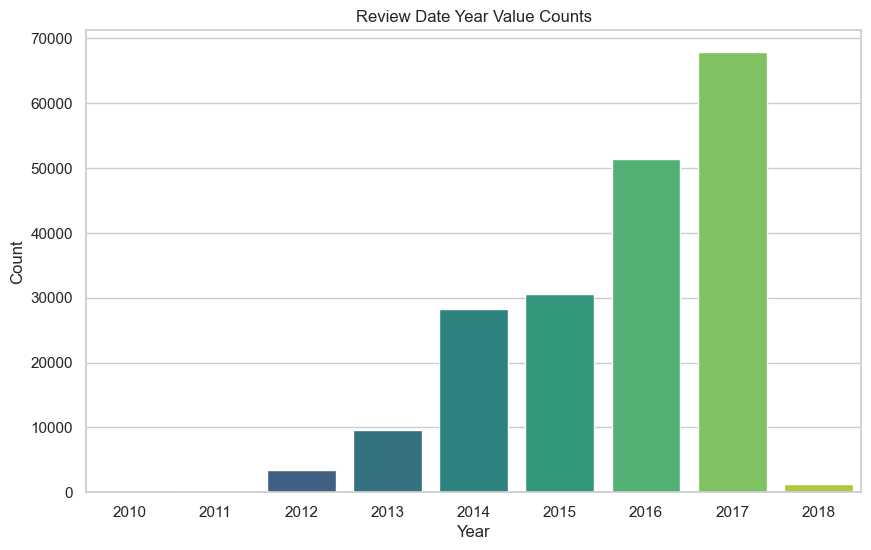

In [ ]:
#create some simple visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#plot review date year value counts
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=rtr['review_date'].dt.year, data=rtr, palette="viridis")
ax.set_title('Review Date Year Value Counts')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
plt.show()


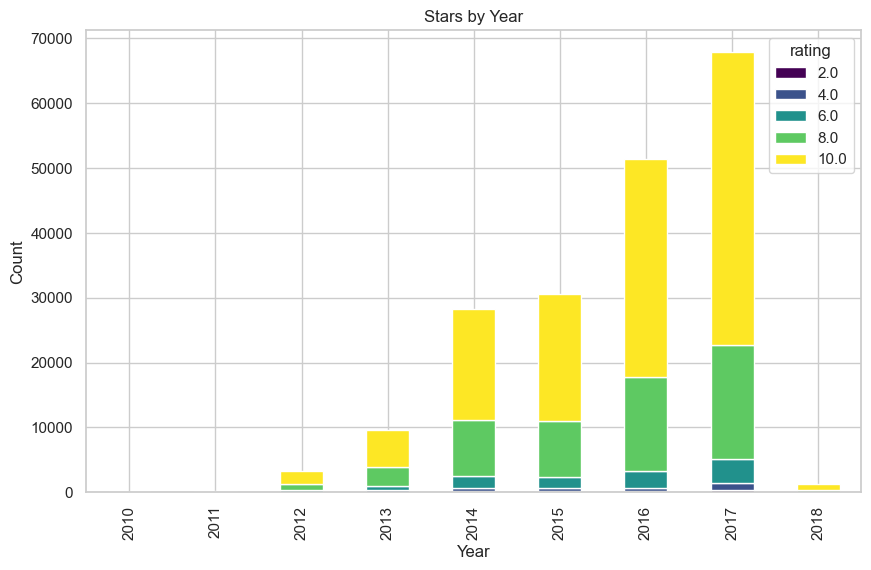

In [ ]:
#stacked bar chart of stars by year
rtr_stars = rtr.groupby([rtr['review_date'].dt.year, 'rating']).size().unstack()
rtr_stars.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Stars by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


<Figure size 667x375 with 0 Axes>

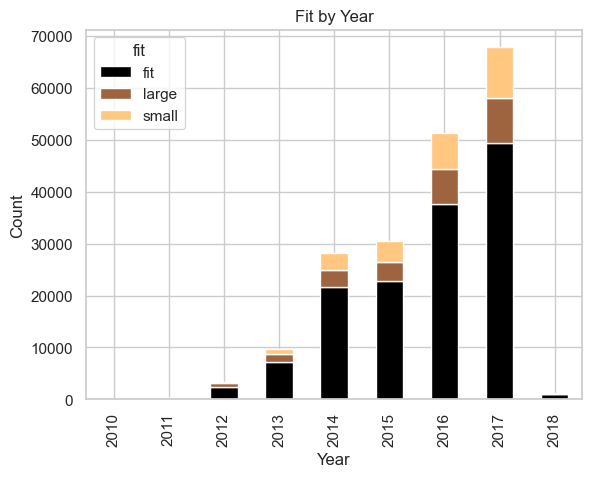

In [ ]:
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
colors = ["#EBDED4", "#8A6851", "#544541","#F6F3EE"]
palette = ListedColormap(sns.color_palette(colors))
palette = 'copper'

# Create a new figure with a transparent background and half the size of a standard PPT slide
fig = plt.figure(facecolor='none', figsize=(6.67, 3.75))

rtr_fit = rtr.groupby([rtr['review_date'].dt.year, 'fit']).size().unstack()
rtr_fit.plot(kind='bar', stacked=True, colormap=palette)
plt.title('Fit by Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Save the figure as a transparent PNG
plt.savefig('graph.png', transparent=True, dpi=300)

plt.show()

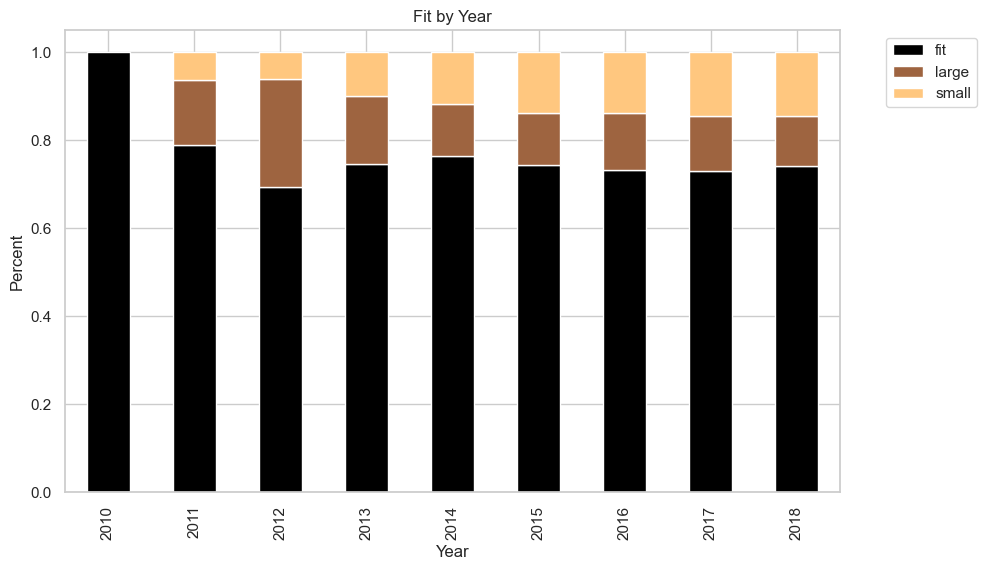

In [ ]:
#make it into percents
rtr_fit = rtr_fit.div(rtr_fit.sum(axis=1), axis=0)
rtr_fit.plot(kind='bar', stacked=True, colormap=palette, figsize=(10, 6))
plt.title('Fit by Year')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 667x375 with 0 Axes>

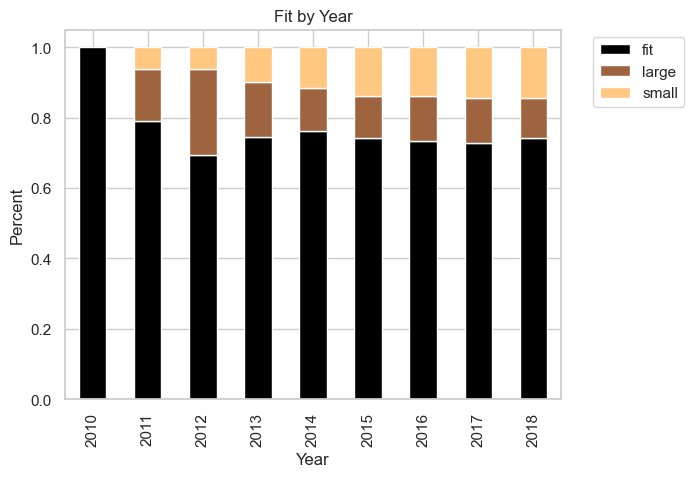

In [ ]:
rtr_fit = rtr_fit.div(rtr_fit.sum(axis=1), axis=0)

# Define a custom color palette
colors = ["#EBDED4", "#8A6851", "#544541","#F6F3EE"]
palette = ListedColormap(sns.color_palette(colors))
palette = 'copper'

# Create a new figure with a transparent background and half the size of a standard PPT slide
fig = plt.figure(facecolor='none', figsize=(6.67, 3.75))

rtr_fit.plot(kind='bar', stacked=True, colormap=palette)
plt.title('Fit by Year')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the figure as a transparent PNG
plt.savefig('graph.png', transparent=True, dpi=300)

plt.show()